<a href="https://colab.research.google.com/github/IvankoPilotOfHalychyna/Foundations_AI/blob/main/Tutorial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 3

In this tutorial, you will continue working on EDA (Exploratory Data Analysis).

## Exercise
Your task is to perform an Exploratory Data Analysis (**EDA**) on the Titanic dataset.

### Load the Dataset
- Load the dataset (`titanic.csv`)

### Understand the Data
- **Preview the Data:** View the first few rows to get a sense of what the data looks like. Use `.head()` or equivalent.
- **Data Types:** Check the data types of each column (e.g., numerical, categorical). Use `.info()` to check for null values and non-standard data types.
- **Check for Missing Values:** Identify columns with missing data. Discuss how you will handle them (e.g., imputation, dropping rows/columns).

### Summary Statistics
- **Descriptive Statistics:** Calculate basic summary statistics for numerical columns (mean, median, standard deviation, etc.) using `.describe()`.
- **Categorical Data:** Use `.value_counts()` to explore the frequency of each category in categorical columns like 'Survived', 'Embarked', etc.

### Visualize the Data:

- **Univariate Analysis:**
  - For numerical data, use histograms or boxplots to visualize the distribution.
  - For categorical data, use bar plots to show the frequency of different categories.

- **Bivariate Analysis:**

  - Explore relationships between two variables (e.g., age vs. fare, survived vs. sex, etc.). Use scatter plots, pair plots, or correlation matrices.

  - Visualize the impact of categorical features (e.g., sex, class) on the target variable 'Survived'. Use count plots, bar plots, or stacked bar charts.

- **Correlation Matrix:** If relevant, create a heatmap to examine correlations between numerical features.

### Handle Outliers and Anomalies:

- Identify and discuss any potential outliers or anomalies in the dataset (e.g., extremely high fares or ages).

- Decide how you will treat these outliers, if necessary.


### Document Your Findings:
- Summarize key insights from your EDA, including any patterns you notice or relationships that are particularly important for predicting survival.
- Provide visualizations to support your conclusions.

### Important:

**Be thorough:** Try to uncover as many insights as possible about the data.

**Be methodical:** Follow a logical sequence of steps—first exploring, then visualizing, and finally concluding.

**Be clear:** Document your process clearly so that someone unfamiliar with your analysis could understand your findings.

--- 1. Loading Data ---
Dataset loaded successfully.
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

--- 2. Data Info & Missing Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-

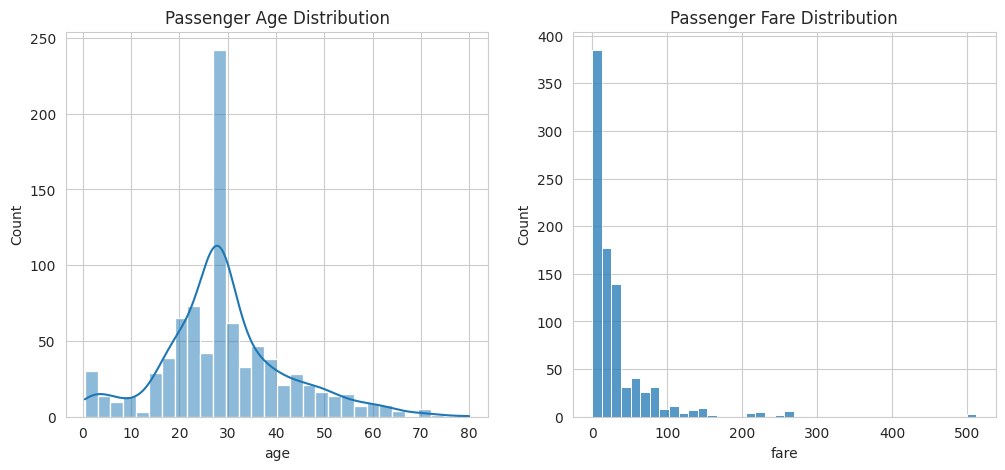

Showing key survival plots (Sex and Class)...


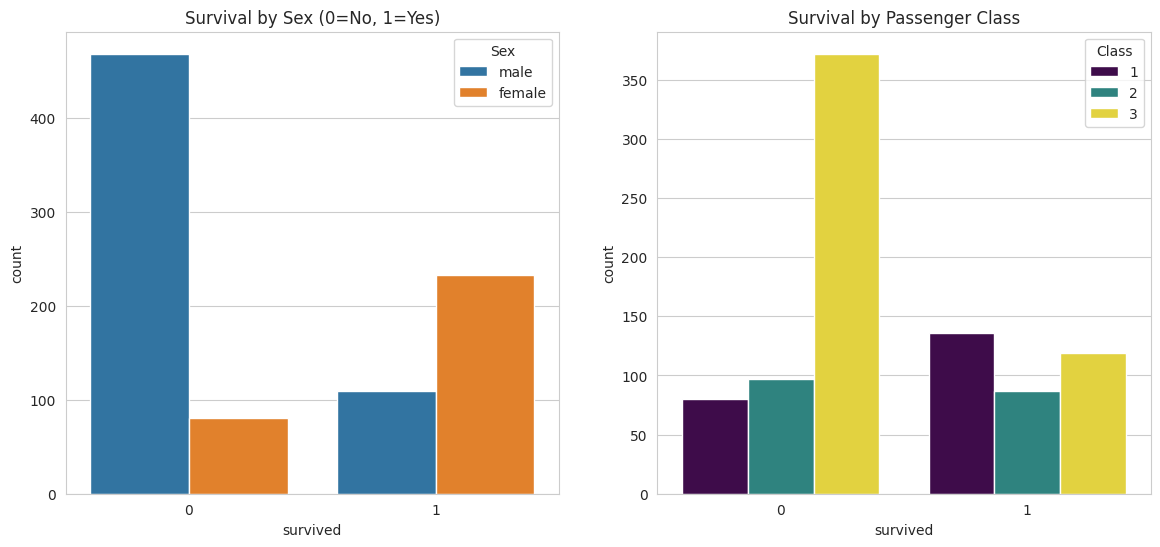

Showing correlation heatmap...


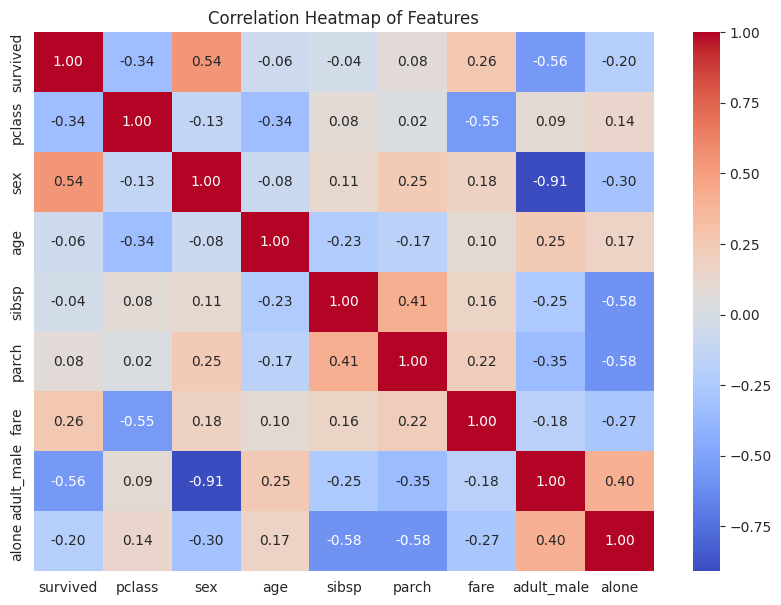


--- 6. Final EDA Summary ---
Based on the analysis, here are the key insights:
 * **Survival Rate:** Only 38.38% of passengers survived.
 * **Sex:** Being FEMALE was the strongest predictor of survival (see plot 3).
 * **Class:** 1st Class passengers had a much higher survival rate than 3rd Class (see plot 4).
 * **Fare/Age:** The heatmap shows 'fare' and 'pclass' are strongly related.
 * **Outliers:** The 'Fare' distribution shows a few passengers paid a *lot* more,
     which aligns with the 1st Class high survival rate. Money/Status mattered!

--- EDA Complete ---


In [5]:
# 1. Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the visual style for our plots
sns.set_style("whitegrid")

# 2. Load the Dataset

print("--- 1. Loading Data ---")
df = sns.load_dataset('titanic')
print("Dataset loaded successfully.")
print(df.head()) # Show the first 5 rows

# 3. Understand the Data (Info, Missing Values, Stats)
print("\n--- 2. Data Info & Missing Values ---")
df.info()

print("\n--- 3. Numerical Statistics ---")
# .describe() gives us stats like mean, median (50%), etc.
print(df.describe())

# 4. Data Cleaning
print("\n--- 4. Cleaning Data ---")

median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)
print(f"Filled missing 'age' values with median: {median_age}")

mode_embarked = df['embarked'].mode()[0]
df['embarked'] = df['embarked'].fillna(mode_embarked)
print(f"Filled missing 'embarked' values with mode: {mode_embarked}")

# Drop 'deck' (too many missing) and 'embark_town' (redundant with 'embarked')
df = df.drop(['deck', 'embark_town'], axis=1)
print("Dropped 'deck' and 'embark_town' columns.")
print("Data cleaning complete.")


# 5. Visualize the Data
print("\n--- 5. Generating Visualizations ---")

# --- Plot 1 & 2: Univariate Analysis (Age and Fare) ---
print("Showing plots for Age and Fare distributions...")
plt.figure(figsize=(12, 5))

# Plot 1: Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Passenger Age Distribution')

# Plot 2: Fare Distribution (Note: very skewed!)
plt.subplot(1, 2, 2)
sns.histplot(df['fare'], bins=40, kde=False)
plt.title('Passenger Fare Distribution')
plt.show()


# --- Plot 3 & 4: Bivariate Analysis (Who Survived?) ---
print("Showing key survival plots (Sex and Class)...")
plt.figure(figsize=(14, 6))

# Plot 3: Survival by Sex (Key Finding 1)
plt.subplot(1, 2, 1)
sns.countplot(x='survived', hue='sex', data=df)
plt.title('Survival by Sex (0=No, 1=Yes)')
plt.legend(title='Sex', loc='upper right')

# Plot 4: Survival by Class (Key Finding 2)
plt.subplot(1, 2, 2)
sns.countplot(x='survived', hue='pclass', data=df, palette='viridis')
plt.title('Survival by Passenger Class')
plt.legend(title='Class', loc='upper right')
plt.show()


# --- Plot 5: Correlation Heatmap ---
print("Showing correlation heatmap...")
# We need to convert 'sex' to a number (0 or 1) for the heatmap
df_corr = df.copy()
df_corr['sex'] = df_corr['sex'].map({'male': 0, 'female': 1})

# Calculate the correlation
corr_matrix = df_corr.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


# 6. Document Final Findings
print("\n--- 6. Final EDA Summary ---")
print("Based on the analysis, here are the key insights:")
print(f" * **Survival Rate:** Only {df['survived'].mean() * 100:.2f}% of passengers survived.")
print(" * **Sex:** Being FEMALE was the strongest predictor of survival (see plot 3).")
print(" * **Class:** 1st Class passengers had a much higher survival rate than 3rd Class (see plot 4).")
print(" * **Fare/Age:** The heatmap shows 'fare' and 'pclass' are strongly related.")
print(" * **Outliers:** The 'Fare' distribution shows a few passengers paid a *lot* more,")
print("     which aligns with the 1st Class high survival rate. Money/Status mattered!")

print("\n--- EDA Complete ---")